In [1]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import sklearn.linear_model
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC, LinearSVC
from sklearn.semi_supervised import label_propagation

# Import miTranscriptome Data (Deprecated)

In [ ]:
# lncrna_exp = pd.read_table("../data/raw/MiTranscriptome-SKCM_lncRNA_exp/mitranscriptome.expr.fpkm.tsv", delimiter="\t")

In [130]:
# lncrna_exp.index = lncrna_exp["transcript_id"]
# lncrna_exp = lncrna_exp.iloc[1:,:]
# lncrna_exp = lncrna_exp.T
lncrna_exp

,Gene_ID,SKCM-Tumor-TCGA-D3-A1Q1,SKCM-Tumor-TCGA-D3-A1Q3,SKCM-Tumor-TCGA-D3-A1Q4,SKCM-Tumor-TCGA-D3-A1Q5,SKCM-Tumor-TCGA-D3-A1Q6,SKCM-Tumor-TCGA-D3-A1Q7,SKCM-Tumor-TCGA-D3-A1Q8,SKCM-Tumor-TCGA-D3-A1Q9,SKCM-Tumor-TCGA-D3-A1QA,...,SKCM-Tumor-TCGA-GF-A3OT,SKCM-Tumor-TCGA-GN-A261,SKCM-Tumor-TCGA-GN-A262,SKCM-Tumor-TCGA-GN-A264,SKCM-Tumor-TCGA-GN-A265,SKCM-Tumor-TCGA-GN-A266,SKCM-Tumor-TCGA-GN-A267,SKCM-Tumor-TCGA-GN-A268,SKCM-Tumor-TCGA-GN-A26A,SKCM-Tumor-TCGA-GN-A26D
0,ENSG00000005206.12,0.221485,0.301805,0.390620,1.380212,0.108369,0.568456,0.317182,0.049637,0.361728,...,0.310220,0.704263,0.918968,0.407143,0.351461,0.881316,1.137700,0.809325,0.480373,0.318671
1,ENSG00000031544.10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035605,0.000000,0.000000,...,0.017139,0.030989,0.000000,0.015993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000083622.8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.014868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000088970.11,0.135885,0.053352,0.091178,0.264219,0.126814,0.068246,0.080199,0.038024,0.116305,...,0.000323,0.403619,0.145616,0.174845,0.077805,0.117024,0.045492,0.023763,0.030293,0.105355
4,ENSG00000099869.6,0.000000,0.000000,0.021028,0.000000,0.000000,0.000000,0.021514,0.000000,0.000000,...,0.041424,0.509890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030828,0.000000
5,ENSG00000100181.17,0.066190,0.063315,2.161100,4.791449,0.470844,0.115449,0.131042,0.014968,0.022503,...,0.093135,0.561728,0.012476,0.073439,0.154906,0.184371,0.031762,0.012495,0.158829,0.018362
6,ENSG00000104691.10,0.157255,0.170210,0.432922,0.526319,0.422747,0.167906,0.218024,0.053316,0.267351,...,0.130371,0.115324,0.379136,0.153083,0.073951,0.124153,0.478343,0.233748,0.664933,0.364459
7,ENSG00000110347.7,0.000000,0.015005,0.020663,0.000000,0.000000,0.113145,0.000000,0.038638,0.000000,...,0.000000,0.000000,0.000000,0.018992,0.000000,0.203660,0.000000,0.000000,0.302928,0.000000
8,ENSG00000115934.11,0.000000,0.000000,0.000000,0.000000,0.000000,0.004087,0.000000,0.003402,0.000000,...,0.000000,0.012619,0.003913,0.000000,0.000000,0.000000,0.000000,0.000000,0.019694,0.000000
9,ENSG00000117242.7,0.024147,0.089057,0.050449,0.356765,0.081990,0.057307,0.048321,0.072257,0.040198,...,0.038062,0.354938,0.205212,0.134669,0.038843,0.255237,0.000000,0.038885,0.018884,0.000000


In [46]:
library_info = pd.read_table("../data/raw/MiTranscriptome-SKCM_lncRNA_exp/library_info.txt", delimiter="\t")
library_info = library_info[library_info["tcga_cancer_type"] == "SKCM"]
library_info["tcga_legacy_sample_id"] = library_info["tcga_legacy_sample_id"].str.slice(0,12)
print list(library_info.columns)
# library_info.head()
print library_info.shape
# library_info[library_info["study_id"] == "uc010roh.3"]
# library_info["sample_type"].unique()
library_info

['library_id', 'study_id', 'cohort_id', 'species', 'library_protocol', 'fragment_layout', 'cancer_progression', 'cancer_type', 'harvest_site', 'sample_type', 'tcga_cancer_type', 'tcga_legacy_sample_id', 'total_fragments', 'frag_size_mean', 'frag_size_stdev', 'total_aligned_reads', 'mean_read_length', 'aligned_bases', 'pct_mrna_bases', 'pct_intronic_bases', 'pct_intergenic_bases']
(265, 21)


,library_id,study_id,cohort_id,species,library_protocol,fragment_layout,cancer_progression,cancer_type,harvest_site,sample_type,...,tcga_legacy_sample_id,total_fragments,frag_size_mean,frag_size_stdev,total_aligned_reads,mean_read_length,aligned_bases,pct_mrna_bases,pct_intronic_bases,pct_intergenic_bases
5148,aaea9670-416a-4293-af12-8bfeb47b0150,phs000178,skin,human,polya_transcriptome,paired,cancer,melanoma,primary_tumor,tissue,...,TCGA-GN-A263,59610748,176,52,90405894,48,4338917038,0.906365,0.040369,0.053261
5149,73b2e2ac-aafd-40e7-8759-ffa226f04a3b,phs000178,skin,human,polya_transcriptome,paired,cancer,melanoma,primary_tumor,tissue,...,TCGA-BF-A1PX,87929125,189,55,148097529,48,7108119385,0.920194,0.020730,0.059075
5150,ca667c68-e9fb-4003-8639-5fa1d00a7a95,phs000178,skin,human,polya_transcriptome,paired,cancer,melanoma,primary_tumor,tissue,...,TCGA-BF-A3DM,74273837,190,57,138166617,48,6631431000,0.929954,0.024018,0.046026
5151,132fbce2-00f3-4ae7-ba18-03bd55529d5a,phs000178,skin,human,polya_transcriptome,paired,cancer,melanoma,primary_tumor,tissue,...,TCGA-EB-A1NK,105410626,188,54,186153542,48,8934650872,0.941784,0.021855,0.036361
5152,5798deb1-2248-474f-b0cd-20c966128d9d,phs000178,skin,human,polya_transcriptome,paired,cancer,melanoma,primary_tumor,tissue,...,TCGA-GF-A2C7,86979753,184,57,151531306,48,7272806761,0.901976,0.048794,0.049228
5153,376614bb-480e-4a7f-9539-da6ce053988a,phs000178,skin,human,polya_transcriptome,paired,cancer,melanoma,primary_tumor,tissue,...,TCGA-ER-A194,69794615,170,48,95875022,48,4601696158,0.937451,0.023451,0.039090
5154,cc0cd3e6-a133-4796-ab06-5adb905d5184,phs000178,skin,human,polya_transcriptome,paired,cancer,melanoma,primary_tumor,tissue,...,TCGA-EB-A24C,90679165,178,55,164459829,48,7893331953,0.909517,0.037165,0.053317
5155,9ff4d588-da73-4e26-975d-2b098fe74984,phs000178,skin,human,polya_transcriptome,paired,cancer,melanoma,primary_tumor,tissue,...,TCGA-BF-A1PU,85539875,181,55,154298231,48,7405681039,0.933139,0.022900,0.043960
5156,27bf4227-d8a9-4048-af7e-01c6d5d0e777,phs000178,skin,human,polya_transcriptome,paired,cancer,melanoma,primary_tumor,tissue,...,TCGA-BF-A1PZ,85121939,173,55,155469327,48,7461917475,0.928395,0.029559,0.042046
5157,8B4C42A9-7D09-4989-A0E2-43ABB6097137,phs000178,skin,human,polya_transcriptome,paired,cancer,melanoma,primary_tumor,tissue,...,TCGA-EB-A3XC,47561588,192,60,89457336,48,4293611333,0.927555,0.028934,0.043510


In [8]:
lncrna_id = pd.read_csv("../data/raw/MiTranscriptome-SKCM_lncRNA_exp/SKCM_lncrna_id.csv")
lncrna_dict = pd.Series(lncrna_id.Name.values, index=lncrna_id["Transcript ID"]).to_dict()
lncrna_exp.replace({"transcript_id": lncrna_dict}, inplace=True)

{'T054686': 'SBF2-AS1.5',
 'T054687': 'SBF2-AS1.6',
 'T232277': 'KCCAT194',
 'T190264': 'KCCAT636',
 'T148754': 'PRCAT315',
 'T314979': 'MEAT52.2',
 'T141422': 'CAT1901.2',
 'T181493': 'AMAT90',
 'T341075': 'CVAT21',
 'T275568': 'AMAT84',
 'T135202': 'LSCAT282',
 'T019989': 'CAT107',
 'T367646': 'THCAT601',
 'T307419': 'CAT833',
 'T188502': 'CAT236',
 'T146596': 'AMAT106',
 'T146597': 'CAT1928',
 'T203739': 'GBAT21',
 'T231786': 'KHCAT171',
 'T107549': 'CAT1691',
 'T252716': 'CAT458',
 'T165229': 'BRCAT57',
 'T299288': 'KCCAT112',
 'T193444': 'LINC00152.1',
 'T028139': 'PCAT6',
 'T074554': 'CAT1479',
 'T148999': 'KCCAT596',
 'T045632': 'NUTM2A-AS1.2',
 'T193443': 'LINC00152.2',
 'T252882': 'LACAT207',
 'T073015': 'CAT1466.2',
 'T020194': 'HRAT4',
 'T205083': 'LACAT88',
 'T327855': 'CAT950',
 'T218701': 'BRCAT322',
 'T150288': 'CAT1950.1',
 'T044850': 'CAT1283',
 'T317967': 'LVCAT6',
 'T073019': 'CAT1466.3',
 'T177396': 'CAT2113.1',
 'T205779': 'CFLAR-AS1.1',
 'T232309': 'CAT2238',
 'T0

In [22]:
lncrna_exp = lncrna_exp.filter(items=["transcript_id",]+list(library_info["library_id"]))

In [31]:
lncrna_exp.index = lncrna_exp["transcript_id"]
lncrna_exp = lncrna_exp.drop("transcript_id", axis=1).T
lncrna_exp['bcr_patient_barcode'] = lncrna_exp.index
lncrna_exp.reset_index(inplace=True)

In [52]:
lncrna_exp.replace({"bcr_patient_barcode": pd.Series(library_info.tcga_legacy_sample_id.values, index=library_info.library_id).to_dict()}, 
                  inplace=True)

In [421]:
lncrna_exp

,Gene_ID,SKCM-Tumor-TCGA-D3-A1Q1,SKCM-Tumor-TCGA-D3-A1Q3,SKCM-Tumor-TCGA-D3-A1Q4,SKCM-Tumor-TCGA-D3-A1Q5,SKCM-Tumor-TCGA-D3-A1Q6,SKCM-Tumor-TCGA-D3-A1Q7,SKCM-Tumor-TCGA-D3-A1Q8,SKCM-Tumor-TCGA-D3-A1Q9,SKCM-Tumor-TCGA-D3-A1QA,...,SKCM-Tumor-TCGA-GF-A3OT,SKCM-Tumor-TCGA-GN-A261,SKCM-Tumor-TCGA-GN-A262,SKCM-Tumor-TCGA-GN-A264,SKCM-Tumor-TCGA-GN-A265,SKCM-Tumor-TCGA-GN-A266,SKCM-Tumor-TCGA-GN-A267,SKCM-Tumor-TCGA-GN-A268,SKCM-Tumor-TCGA-GN-A26A,SKCM-Tumor-TCGA-GN-A26D
Gene_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000005206,ENSG00000005206,0.221485,0.301805,0.390620,1.380212,0.108369,0.568456,0.317182,0.049637,0.361728,...,0.310220,0.704263,0.918968,0.407143,0.351461,0.881316,1.137700,0.809325,0.480373,0.318671
ENSG00000031544,ENSG00000031544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035605,0.000000,0.000000,...,0.017139,0.030989,0.000000,0.015993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000083622,ENSG00000083622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.014868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000088970,ENSG00000088970,0.135885,0.053352,0.091178,0.264219,0.126814,0.068246,0.080199,0.038024,0.116305,...,0.000323,0.403619,0.145616,0.174845,0.077805,0.117024,0.045492,0.023763,0.030293,0.105355
IGF2-AS,IGF2-AS,0.000000,0.000000,0.021028,0.000000,0.000000,0.000000,0.021514,0.000000,0.000000,...,0.041424,0.509890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030828,0.000000
ENSG00000100181,ENSG00000100181,0.066190,0.063315,2.161100,4.791449,0.470844,0.115449,0.131042,0.014968,0.022503,...,0.093135,0.561728,0.012476,0.073439,0.154906,0.184371,0.031762,0.012495,0.158829,0.018362
ENSG00000104691,ENSG00000104691,0.157255,0.170210,0.432922,0.526319,0.422747,0.167906,0.218024,0.053316,0.267351,...,0.130371,0.115324,0.379136,0.153083,0.073951,0.124153,0.478343,0.233748,0.664933,0.364459
ENSG00000110347,ENSG00000110347,0.000000,0.015005,0.020663,0.000000,0.000000,0.113145,0.000000,0.038638,0.000000,...,0.000000,0.000000,0.000000,0.018992,0.000000,0.203660,0.000000,0.000000,0.302928,0.000000
ENSG00000115934,ENSG00000115934,0.000000,0.000000,0.000000,0.000000,0.000000,0.004087,0.000000,0.003402,0.000000,...,0.000000,0.012619,0.003913,0.000000,0.000000,0.000000,0.000000,0.000000,0.019694,0.000000


# Import lncRNA ENSEMBL nonemclature (TANRIC dataset)

In [2]:
lncrna_exp = pd.read_table("../data/raw/TANRIC-SKCM-lncRNA_exp/TCGA-SKCM-rnaexpr.tsv", delimiter="\t")

In [3]:
lncrna_names = pd.read_table("../data/external/HGNC_RNA_long_non-coding.txt", delimiter="\t")

In [4]:
lncrna_dict = pd.Series(lncrna_names.symbol.values, index=lncrna_names.ensembl_gene_id).to_dict()
lncrna_dict["ENSG00000274721"] = "SPRY4-IT1" # Chr5:142317620-142318322
lncrna_dict["ENSG00000240498"] = "ANRIL" # Chr9:21994791-22121097 (selected 9:21994791-22044790 because 50kb max)
# # lncrna_dict[""] = "RMEL3" Exon1 (Chr5:56690887-56691005)
lncrna_dict["ENSG00000203875"] = "SNHG5" # Chr6:85677007-85678733
# # lncrna_dict[""] = "SLNCR1" # Chr17:72403322-72592804 (selected Chr17:72403322-72453321 because 50kb max)
lncrna_dict["ENSG00000116560"] = "LLME23" # Chr6:165533548-165533786
# "BANCR" # Chr9:69296682-69,306977 

In [5]:
# Replacing ENSG Gene ID to the lncRNA symbol name
lncrna_exp['Gene_ID'] = lncrna_exp['Gene_ID'].str.replace("[.].*", "")
lncrna_exp.replace({"Gene_ID": lncrna_dict}, inplace=True)

# Subsetting lncRNA exp to only key lncRNA's

In [6]:
melanoma_lcrna_exp = lncrna_exp

In [7]:
melanoma_lcrna_exp.index = melanoma_lcrna_exp['Gene_ID']
melanoma_lcrna_exp = melanoma_lcrna_exp.T.iloc[1:,:]

# Filter only lnrRNA expressions in the 13 lncRNA biomarkers


In [8]:
melanoma_lncrnas = ["SPRY4-IT1", "BANCR", "HOTAIR", "MALAT1", "UCA1", "CASC15", "ANRIL", "RMEL3", "SNHG5", "SLNCR1", "SAMMSON", "LLME23", "GAS5"]
melanoma_lcrna_exp = melanoma_lcrna_exp.filter(items=melanoma_lncrnas, axis=1)

In [34]:
# Log 2 transform lncRNA expression data
def lncRNA_exp_transform(x):
    return np.log2(x+1)
melanoma_lcrna_exp = melanoma_lcrna_exp.applymap(lncRNA_exp_transform)

In [10]:
melanoma_lcrna_exp["bcr_patient_barcode"] = melanoma_lcrna_exp.index
print len(melanoma_lcrna_exp["bcr_patient_barcode"].unique())
melanoma_lcrna_exp

226


Gene_ID,HOTAIR,MALAT1,UCA1,CASC15,ANRIL,SNHG5,SAMMSON,GAS5,bcr_patient_barcode
SKCM-Tumor-TCGA-D3-A1Q1,-4.954749,1.056937,-16.610000,1.899652,-5.102630,5.885521,-1.183643,6.355847,SKCM-Tumor-TCGA-D3-A1Q1
SKCM-Tumor-TCGA-D3-A1Q3,-1.771717,3.253181,-16.610000,1.308918,-1.862001,4.875168,-2.608419,3.818640,SKCM-Tumor-TCGA-D3-A1Q3
SKCM-Tumor-TCGA-D3-A1Q4,-0.459055,2.744404,-16.610000,0.026315,-2.232588,5.529213,0.345814,5.846049,SKCM-Tumor-TCGA-D3-A1Q4
SKCM-Tumor-TCGA-D3-A1Q5,2.567640,3.084154,-6.813222,0.632330,-16.610000,3.974051,-1.337087,4.911555,SKCM-Tumor-TCGA-D3-A1Q5
SKCM-Tumor-TCGA-D3-A1Q6,0.557473,3.034719,-0.418887,-2.616813,-2.278941,3.084658,-0.754754,4.031756,SKCM-Tumor-TCGA-D3-A1Q6
SKCM-Tumor-TCGA-D3-A1Q7,1.042103,2.726287,-16.610000,-0.417327,-1.004827,4.577221,-0.639667,4.128122,SKCM-Tumor-TCGA-D3-A1Q7
SKCM-Tumor-TCGA-D3-A1Q8,0.379875,1.261015,-16.610000,0.314668,-7.525788,3.679479,-1.707020,3.419743,SKCM-Tumor-TCGA-D3-A1Q8
SKCM-Tumor-TCGA-D3-A1Q9,-5.869329,3.063182,-6.105752,0.152281,-5.052566,3.727757,2.752284,3.260470,SKCM-Tumor-TCGA-D3-A1Q9
SKCM-Tumor-TCGA-D3-A1QA,-4.156082,1.524015,-7.834412,0.308342,-1.510868,5.054624,0.447697,5.949019,SKCM-Tumor-TCGA-D3-A1QA
SKCM-Tumor-TCGA-D3-A1QB,-5.855862,0.600855,-7.646874,0.488985,-4.473526,3.830398,-1.089961,3.943666,SKCM-Tumor-TCGA-D3-A1QB


# Adding exp of missing lncRNAs

In [11]:
# lncrna_exp = pd.read_table("../data/raw/TANRIC-SKCM-lncRNA_exp/lncRNA_exp_by_genomic_coordinate/ANRIL_log2exp_SKCM.tsv", delimiter="\t")
for fn in os.listdir('../data/raw/TANRIC-SKCM-lncRNA_exp/lncRNA_exp_by_genomic_coordinate/'):
    if len(str.split(fn, ".")) > 1 and str.split(fn, ".")[1] == "tsv":
        lncRNA_name = str.split(fn, "_")[0]
        missing_lncRNA_exp = pd.read_table("../data/raw/TANRIC-SKCM-lncRNA_exp/lncRNA_exp_by_genomic_coordinate/"+fn, delimiter="\t")
        print lncRNA_name, missing_lncRNA_exp.shape
        missing_lncRNA_exp.rename(columns={"lncRNA_exp_log2": lncRNA_name}, inplace=True)
        melanoma_lcrna_exp = melanoma_lcrna_exp.merge(missing_lncRNA_exp.drop(["Cancer", "position_annotation"], axis=1), 
                                       how="outer", left_on="bcr_patient_barcode", right_on="SampleID", suffixes=('','_y'))

ANRIL (226, 4)
SPRY4-IT1 (226, 4)
SLNCR1 (226, 4)
SNHG5 (226, 4)
LLME23 (226, 4)
RMEL3 (226, 4)


In [12]:
# melanoma_lcrna_exp.drop([x for x in melanoma_lcrna_exp.columns if x.endswith('SampleID_y')], axis=1, inplace=True)
# melanoma_lcrna_exp.drop([x for x in melanoma_lcrna_exp.columns if x.endswith('SNHG5_y')], axis=1, inplace=True)
melanoma_lcrna_exp.drop([x for x in melanoma_lcrna_exp.columns if x.endswith('_y')], axis=1, inplace=True)

In [13]:
print melanoma_lcrna_exp.columns
melanoma_lcrna_exp

Index([u'HOTAIR', u'MALAT1', u'UCA1', u'CASC15', u'ANRIL', u'SNHG5',
       u'SAMMSON', u'GAS5', u'bcr_patient_barcode', u'SampleID', u'SPRY4-IT1',
       u'SLNCR1', u'LLME23', u'RMEL3'],
      dtype='object')


,HOTAIR,MALAT1,UCA1,CASC15,ANRIL,SNHG5,SAMMSON,GAS5,bcr_patient_barcode,SampleID,SPRY4-IT1,SLNCR1,LLME23,RMEL3
0,-4.954749,1.056937,-16.610000,1.899652,-5.102630,5.885521,-1.183643,6.355847,SKCM-Tumor-TCGA-D3-A1Q1,SKCM-Tumor-TCGA-D3-A1Q1,-16.610,-5.374,-16.610,-16.610
1,-1.771717,3.253181,-16.610000,1.308918,-1.862001,4.875168,-2.608419,3.818640,SKCM-Tumor-TCGA-D3-A1Q3,SKCM-Tumor-TCGA-D3-A1Q3,-16.610,-5.454,-3.866,-16.610
2,-0.459055,2.744404,-16.610000,0.026315,-2.232588,5.529213,0.345814,5.846049,SKCM-Tumor-TCGA-D3-A1Q4,SKCM-Tumor-TCGA-D3-A1Q4,-16.610,-2.095,-16.610,-4.584
3,2.567640,3.084154,-6.813222,0.632330,-16.610000,3.974051,-1.337087,4.911555,SKCM-Tumor-TCGA-D3-A1Q5,SKCM-Tumor-TCGA-D3-A1Q5,-16.610,-1.245,-16.610,1.476
4,0.557473,3.034719,-0.418887,-2.616813,-2.278941,3.084658,-0.754754,4.031756,SKCM-Tumor-TCGA-D3-A1Q6,SKCM-Tumor-TCGA-D3-A1Q6,-16.610,-6.271,-6.307,-16.610
5,1.042103,2.726287,-16.610000,-0.417327,-1.004827,4.577221,-0.639667,4.128122,SKCM-Tumor-TCGA-D3-A1Q7,SKCM-Tumor-TCGA-D3-A1Q7,-16.610,-2.145,-16.610,-16.610
6,0.379875,1.261015,-16.610000,0.314668,-7.525788,3.679479,-1.707020,3.419743,SKCM-Tumor-TCGA-D3-A1Q8,SKCM-Tumor-TCGA-D3-A1Q8,-16.610,-1.140,-16.610,-16.610
7,-5.869329,3.063182,-6.105752,0.152281,-5.052566,3.727757,2.752284,3.260470,SKCM-Tumor-TCGA-D3-A1Q9,SKCM-Tumor-TCGA-D3-A1Q9,-16.610,-4.571,-16.610,-3.449
8,-4.156082,1.524015,-7.834412,0.308342,-1.510868,5.054624,0.447697,5.949019,SKCM-Tumor-TCGA-D3-A1QA,SKCM-Tumor-TCGA-D3-A1QA,-16.610,-5.669,-8.563,-16.610
9,-5.855862,0.600855,-7.646874,0.488985,-4.473526,3.830398,-1.089961,3.943666,SKCM-Tumor-TCGA-D3-A1QB,SKCM-Tumor-TCGA-D3-A1QB,-16.610,-5.909,-16.610,-16.610


In [14]:
melanoma_lcrna_exp["bcr_patient_barcode"] = melanoma_lcrna_exp["bcr_patient_barcode"].str.replace("SKCM-Tumor-", "")

In [15]:
# Missing lncRNAs
set(melanoma_lncrnas) - set(melanoma_lcrna_exp.columns.tolist())

{'BANCR'}

# Importing all TCGA SKCM patient's clinical data
## Doesn't necessary include all SKCM patients with lncRNA expressions profiled

In [16]:
skcm_clinical = pd.read_table("../data/processed/SKCM_clinical/clinical_SKCM_all.txt__nationwidechildrens.org_clinical_drug_skcm.txt", 
                             delimiter="\t")
skcm_clinical = skcm_clinical[['bcr_patient_barcode', 'pharmaceutical_therapy_type', 'treatment_best_response']].iloc[1:,:]
np.unique(skcm_clinical['treatment_best_response'])

array(['CDE_ID:2857291', 'Clinical Progressive Disease',
       'Complete Response', 'Partial Response', 'Stable Disease',
       '[Not Applicable]', '[Not Available]', '[Unknown]'], dtype=object)

In [29]:
skcm_clinical = skcm_clinical[skcm_clinical["pharmaceutical_therapy_type"] == "Immunotherapy"]
skcm_clinical.replace({"treatment_best_response":{"[Unknown]":-1, "[Not Available]":-1, "[Not Applicable]":-1}}, 
                      inplace=True)

# skcm_clinical = skcm_clinical[skcm_clinical["treatment_best_response"].isin(['Clinical Progressive Disease', 
#                                                                              'Complete Response', 
#                                                                              'Partial Response', 
#                                                                              'Stable Disease',
#                                                                              'CDE_ID:2857291'])]

print skcm_clinical["treatment_best_response"].value_counts()

-1                              38
Clinical Progressive Disease    20
Complete Response               12
Partial Response                 9
Stable Disease                   8
Name: treatment_best_response, dtype: int64


In [30]:
skcm_clinical

,bcr_patient_barcode,pharmaceutical_therapy_type,treatment_best_response
3,TCGA-D3-A1Q1,Immunotherapy,Clinical Progressive Disease
6,TCGA-D3-A1Q6,Immunotherapy,-1
10,TCGA-D3-A2JC,Immunotherapy,-1
11,TCGA-D3-A2JH,Immunotherapy,-1
14,TCGA-D3-A2JN,Immunotherapy,-1
15,TCGA-D3-A2JP,Immunotherapy,Partial Response
16,TCGA-D3-A3C1,Immunotherapy,-1
17,TCGA-D3-A3C7,Immunotherapy,-1
19,TCGA-D3-A3MV,Immunotherapy,Clinical Progressive Disease
29,TCGA-D3-A5GT,Immunotherapy,-1


# Merging lncRNA expression data to clinical data, select only samples with immunotherapy responses

In [19]:
melanoma_lcrna_immuno_exp = melanoma_lcrna_exp.merge(skcm_clinical, how="inner", 
                                                     left_on="bcr_patient_barcode", right_on="bcr_patient_barcode")

In [102]:
skcm_clinical["treatment_best_response"] = skcm_clinical.merge(melanoma_lcrna_immuno_exp[["bcr_patient_barcode", "treatment_best_response"]], 
                                                               how="left", 
                                                               left_on="bcr_patient_barcode", 
                                                               right_on="bcr_patient_barcode", 
                                                               suffixes=('_x', ''))["treatment_best_response"]
skcm_clinical

,bcr_patient_barcode,pharmaceutical_therapy_type,treatment_best_response
3,TCGA-D3-A1Q1,Immunotherapy,Clinical Progressive Disease
6,TCGA-D3-A1Q6,Immunotherapy,Clinical Progressive Disease
10,TCGA-D3-A2JC,Immunotherapy,Complete Response
11,TCGA-D3-A2JH,Immunotherapy,Complete Response
14,TCGA-D3-A2JN,Immunotherapy,Partial Response
15,TCGA-D3-A2JP,Immunotherapy,Stable Disease
16,TCGA-D3-A3C1,Immunotherapy,Clinical Progressive Disease
17,TCGA-D3-A3C7,Immunotherapy,Clinical Progressive Disease
19,TCGA-D3-A3MV,Immunotherapy,Clinical Progressive Disease
29,TCGA-D3-A5GT,Immunotherapy,Clinical Progressive Disease


In [96]:
melanoma_lcrna_immuno_exp

,bcr_patient_barcode,treatment_best_response,ZNF645,ZNF165,ZEB2,ZCRB1,ZCCHC2,ZAP70,YBX2,XRCC6,...,ACRBP,ACP5,ACAP1,ACADM,ABTB1,ABHD3,ABCD1,ABCB1,ABCA1,ABAT
0,TCGA-D3-A1Q1,Clinical Progressive Disease,0,22.9585,3270.77,311.605,230.301,3.2235,3.9398,10945.6,...,33.3095,2450.93,6.447,916.905,127.507,167.98,239.613,80.5874,429.43,45.4871
1,TCGA-D3-A1Q6,Clinical Progressive Disease,0,16.1142,1726.98,1070.44,307.592,13.3517,0.4604,7129.37,...,11.0497,142.726,24.4015,794.199,278.545,166.667,361.418,19.7974,763.808,31.768
2,TCGA-D3-A2JC,Clinical Progressive Disease,0,7.2669,1958.01,597.497,476.015,134.437,27.4526,6476.38,...,19.782,5905.93,189.746,362.132,500.202,159.467,2292.69,34.7194,885.345,161.486
3,TCGA-D3-A2JH,Clinical Progressive Disease,0,13.5084,3071.95,632.547,468.026,592.197,0.5934,6263.46,...,56.9648,6640.85,536.716,974.929,385.7,297.285,1902.09,85.1506,1187.05,105.622
4,TCGA-D3-A2JN,Clinical Progressive Disease,0.5453,10.9051,892.585,1262.81,223.55,220.284,17.4482,4954.74,...,11.4504,1883.32,400.218,224.1,1387.68,535.987,613.413,32.7154,1866.96,238.822
5,TCGA-D3-A2JP,Partial Response,0,16.5441,1806.62,746.691,124.632,162.5,1.1029,7943.38,...,15.0735,2461.4,180.147,653.309,615.441,437.132,3268.38,24.6324,911.393,45.5882
6,TCGA-D3-A3C1,Clinical Progressive Disease,0,3.629,1569.35,199.194,234.274,34.2742,52.4194,6668.55,...,5.6452,5421.77,106.048,229.435,1464.52,119.758,965.323,18.5484,871.77,709.677
7,TCGA-D3-A3C7,Clinical Progressive Disease,0,23.6486,1366.55,872.044,223.987,82.348,86.5709,7521.96,...,21.9595,4279.98,162.584,655.828,943.835,121.622,992.399,390.203,222.128,209.037
8,TCGA-D3-A3MV,Clinical Progressive Disease,0,25.36,2399.42,894.26,209.27,12.0512,11.7422,12542.8,...,35.2266,3712.08,31.8275,641.185,576.603,85.9034,469.996,61.183,1102.83,45.7327
9,TCGA-D3-A5GT,Clinical Progressive Disease,0,26.0611,2014.89,503.351,148.868,58.8235,84.14,6743.11,...,8.1906,7435.59,14.892,1406.55,556.962,192.852,1989.58,6.7014,1883.1,52.1221


In [21]:
# melanoma_lcrna_immuno_exp[melanoma_lcrna_immuno_exp["treatment_best_response"].notnull()]
melanoma_lcrna_immuno_exp.dropna(axis=1, inplace=True)
melanoma_lcrna_immuno_exp

,HOTAIR,MALAT1,UCA1,CASC15,ANRIL,SNHG5,SAMMSON,GAS5,bcr_patient_barcode,SampleID,SPRY4-IT1,SLNCR1,LLME23,RMEL3,pharmaceutical_therapy_type,treatment_best_response
0,-4.954749,1.056937,-16.610000,1.899652,-5.102630,5.885521,-1.183643,6.355847,TCGA-D3-A1Q1,SKCM-Tumor-TCGA-D3-A1Q1,-16.610,-5.374,-16.610,-16.610,Immunotherapy,Clinical Progressive Disease
1,0.557473,3.034719,-0.418887,-2.616813,-2.278941,3.084658,-0.754754,4.031756,TCGA-D3-A1Q6,SKCM-Tumor-TCGA-D3-A1Q6,-16.610,-6.271,-6.307,-16.610,Immunotherapy,-1
2,-2.336114,3.021519,-7.713047,-0.762490,-1.735273,5.275656,-0.987479,5.473493,TCGA-D3-A2JH,SKCM-Tumor-TCGA-D3-A2JH,-16.610,-4.058,-16.610,-16.610,Immunotherapy,-1
3,-7.434439,3.887705,-16.610000,-4.096420,-4.730820,3.327607,-3.428106,5.596128,TCGA-D3-A2JN,SKCM-Tumor-TCGA-D3-A2JN,-16.610,-4.418,-16.610,1.216,Immunotherapy,-1
4,-4.187627,3.932285,-16.610000,-1.025823,-1.792554,5.649553,-1.260712,5.198739,TCGA-D3-A2JP,SKCM-Tumor-TCGA-D3-A2JP,-16.610,-6.427,-5.443,-16.610,Immunotherapy,Partial Response
5,-6.185836,0.527955,-16.610000,-1.091340,-4.498357,5.230924,-0.623180,4.397148,TCGA-D3-A3C1,SKCM-Tumor-TCGA-D3-A3C1,-16.610,-5.907,-16.610,-16.610,Immunotherapy,-1
6,-1.650860,2.472832,-16.610000,-1.217443,-6.131296,4.182328,-3.375268,3.128444,TCGA-D3-A3C7,SKCM-Tumor-TCGA-D3-A3C7,-16.610,-4.707,-16.610,-16.610,Immunotherapy,-1
7,-0.180198,2.915019,-6.748868,1.266341,-1.905685,3.344050,1.794626,5.455271,TCGA-D3-A3MV,SKCM-Tumor-TCGA-D3-A3MV,-16.610,-6.479,-5.482,-16.610,Immunotherapy,Clinical Progressive Disease
8,-16.610000,0.520291,-16.610000,0.840218,-4.278267,4.477003,-0.595337,4.707878,TCGA-D9-A148,SKCM-Tumor-TCGA-D9-A148,-16.610,-0.766,-16.610,-0.613,Immunotherapy,-1
9,-4.456012,2.649019,-5.918045,0.953963,-2.308763,4.030114,-1.196286,4.397311,TCGA-DA-A1I1,SKCM-Tumor-TCGA-DA-A1I1,-16.610,-4.661,-5.237,-4.231,Immunotherapy,-1


# Importing TCGA Gene Expression data (Filter Immune Genes from TCIA)

In [22]:
skcm_gene_exp = pd.read_table("../data/processed/SKCM__geneExp_normalized.txt", delimiter="\t")
skcm_gene_exp.drop(["EntrezID"], axis=1, inplace=True)
skcm_gene_exp = skcm_gene_exp[skcm_gene_exp["GeneSymbol"] != "?"]
skcm_gene_exp.index = skcm_gene_exp['GeneSymbol']
skcm_gene_exp = skcm_gene_exp.T.iloc[1:,:]

In [23]:
_, i = np.unique(skcm_gene_exp.columns, return_index=True)
skcm_gene_exp = skcm_gene_exp.iloc[:, i]

In [24]:
immune_genes = pd.read_table("../data/processed/TCIA-GeneExpressionHeatmap_SKCM.csv", delimiter="\t")["Genes"]

In [25]:
skcm_gene_exp = skcm_gene_exp.filter(immune_genes.tolist(), axis=1)

In [26]:
skcm_gene_exp["bcr_patient_barcode"] = skcm_gene_exp.index

In [27]:
skcm_gene_exp["bcr_patient_barcode"] = skcm_gene_exp["bcr_patient_barcode"].str[0:12]

# Label Propagation for Semi-Supervised Learning from Immune Gene Expressions

In [32]:
melanoma_lcrna_immuno_exp["treatment_best_response"].value_counts()

-1                              41
Clinical Progressive Disease    20
Complete Response               12
Partial Response                 9
Stable Disease                   8
Name: treatment_best_response, dtype: int64

In [52]:
melanoma_lcrna_immuno_exp = skcm_clinical[["bcr_patient_barcode", "treatment_best_response"]].merge(skcm_gene_exp, 
                    left_on="bcr_patient_barcode",
                    right_on="bcr_patient_barcode")

X = melanoma_lcrna_immuno_exp.drop(["bcr_patient_barcode", "treatment_best_response"], axis=1)
print X.shape, X.columns

(90, 1012) Index([u'ZNF645', u'ZNF165', u'ZEB2', u'ZCRB1', u'ZCCHC2', u'ZAP70', u'YBX2',
       u'XRCC6', u'XPO6', u'XAGE5',
       ...
       u'ACRBP', u'ACP5', u'ACAP1', u'ACADM', u'ABTB1', u'ABHD3', u'ABCD1',
       u'ABCB1', u'ABCA1', u'ABAT'],
      dtype='object', length=1012)


In [53]:
# X = X.filter(["MBP", "THBD", "ELMOD3", "EGR3", "AHCYL1", "WIPF1"], axis=1)
X = X.applymap(lncRNA_exp_transform)

NameError: name 'y_semi' is not defined

In [55]:
y_semi = melanoma_lcrna_immuno_exp["treatment_best_response"]
print "before\n", y_semi.value_counts()
label_prop_model = label_propagation.LabelPropagation(kernel='knn', gamma=1, alpha=0.1, n_neighbors=1)
label_prop_model.fit(preprocessing.StandardScaler(with_mean=True, with_std=True).fit_transform(X), y_semi)
y_semi_predicted = pd.Series(label_prop_model.predict(preprocessing.StandardScaler(with_mean=True, with_std=True).fit_transform(X)))
print "after\n", y_semi_predicted.value_counts()

before
-1                              41
Clinical Progressive Disease    20
Complete Response               12
Partial Response                 9
Stable Disease                   8
Name: treatment_best_response, dtype: int64
after
Clinical Progressive Disease    59
Complete Response               13
Partial Response                10
Stable Disease                   8
dtype: int64


In [56]:
melanoma_lcrna_immuno_exp["treatment_best_response"] = y_semi_predicted

# Prepare X, y for classification 

In [57]:
# X = melanoma_lcrna_immuno_exp.drop(['bcr_patient_barcode', 'SampleID', 'pharmaceutical_therapy_type', 'treatment_best_response'], axis=1

# X = X.applymap(lncRNA_exp_transform) # Log2 transform lncRNA expressions
X

,ZNF645,ZNF165,ZEB2,ZCRB1,ZCCHC2,ZAP70,YBX2,XRCC6,XPO6,XAGE5,...,ACRBP,ACP5,ACAP1,ACADM,ABTB1,ABHD3,ABCD1,ABCB1,ABCA1,ABAT
0,0.000000,4.582466,11.675857,8.288195,7.853627,2.078439,2.304453,13.418190,11.498268,0.000000,...,5.100536,11.259703,2.896659,9.842202,7.005705,7.400708,7.910572,6.350274,8.749636,5.538759
1,0.000000,4.097122,10.754871,10.065338,8.269557,3.843150,0.546364,12.799762,12.049675,0.000000,...,3.590925,7.167173,4.666842,9.635172,8.126937,7.389452,8.501511,4.378331,9.578953,5.034216
2,0.000000,3.047346,10.935912,9.225200,8.897892,7.081476,4.830489,12.661195,10.671359,0.000000,...,4.377263,12.528194,7.575507,8.504349,8.969248,7.326134,11.163456,5.158636,9.791725,7.344169
3,0.000000,3.858817,11.585408,9.307308,8.873523,9.212367,0.672108,12.612975,11.336384,0.374845,...,5.857105,12.697370,9.070700,9.930633,8.595069,8.220549,10.894129,6.428789,10.214383,6.736365
4,0.627887,3.573508,9.803460,10.303568,7.810890,7.789752,4.205408,12.274886,11.065993,0.000000,...,3.638120,10.879825,8.648243,7.814424,10.439496,9.068743,9.263066,5.075336,10.867246,7.905821
5,0.000000,4.132914,10.819874,9.546299,6.973065,7.353147,1.072380,12.955719,10.774569,0.000000,...,4.006612,11.265848,7.501018,9.353828,9.267819,8.775223,11.674802,4.679897,9.833512,5.541893
6,0.000000,2.210701,10.616875,7.645251,7.878199,5.140541,5.739292,12.703373,11.390637,0.000000,...,2.732313,12.404815,6.742119,7.848219,10.517193,6.915976,9.916361,4.288979,9.769458,9.473051
7,0.000000,4.623434,10.417382,9.769910,7.813695,6.381076,6.452380,12.877085,11.127663,0.000000,...,4.521019,12.063726,7.353892,9.359371,9.883918,6.938069,9.956229,8.611773,7.801730,7.714501
8,0.000000,4.720278,11.229073,9.806163,7.716103,3.706111,3.671542,13.614689,11.487046,5.009414,...,5.178978,11.858399,5.036833,9.326845,9.173935,6.441341,8.879572,5.958448,10.108305,5.546360
9,0.000000,4.758149,10.977203,8.978283,7.227550,5.902640,6.411765,12.719413,11.408357,0.000000,...,3.200159,12.860426,3.990229,10.458973,9.124023,7.598810,10.958970,2.945121,10.879658,5.731240


In [58]:
# y = melanoma_lcrna_immuno_exp["treatment_best_response"].as_matrix()
# y = y_semi.as_matrix()
y = melanoma_lcrna_immuno_exp.replace({"treatment_best_response":{"Clinical Progressive Disease":-1, 
                                                               "Stable Disease":0, 
                                                               "Partial Response":1, 
                                                               "Complete Response":2}}, 
                                      inplace=False)["treatment_best_response"].as_matrix()

y

array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  2,  2, -1, -1,  1,  0, -1,
       -1, -1,  2,  2,  2,  2,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2,  0,  2, -1, -1,  1, -1,  0,  0,  0,  0,  0,
        2, -1, -1, -1, -1,  2,  1,  2, -1, -1,  1,  1,  1,  1,  2,  2, -1,
       -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1])

In [59]:
lncrna_list = X.columns
lncrna_list

Index([u'ZNF645', u'ZNF165', u'ZEB2', u'ZCRB1', u'ZCCHC2', u'ZAP70', u'YBX2',
       u'XRCC6', u'XPO6', u'XAGE5',
       ...
       u'ACRBP', u'ACP5', u'ACAP1', u'ACADM', u'ABTB1', u'ABHD3', u'ABCD1',
       u'ABCB1', u'ABCA1', u'ABAT'],
      dtype='object', length=1012)

# Using expression array to predict treatment response

In [64]:
# model = sklearn.linear_model.Lasso(alpha=1e-1, fit_intercept=False, copy_X=True, normalize=True, max_iter=2000)
model = sklearn.linear_model.LogisticRegression(C=5e-2, penalty='l1', fit_intercept=False, class_weight="balanced")
# model = LinearSVC(C=1e0, penalty='l1', class_weight='balanced', dual=False, multi_class="ovr")
# model = SVC(C=1e0, kernel="rbf", class_weight="balanced", decision_function_shape="ovo")
# model = DecisionTreeClassifier(criterion='gini', splitter='best', max_features=2, max_depth=2, class_weight="balanced")
# model = sklearn.linear_model.LassoCV(cv=2, fit_intercept=False, copy_X=True, normalize=True, max_iter=2000)

# model.fit(X=preprocessing.scale(X=X, with_mean=True, with_std=False),y=y)
model.fit(X=X, y=y)

print "coef:", len(np.nonzero(model.coef_)[0])

print metrics.classification_report(y_pred=np.asanyarray(np.round(model.predict(X)), dtype=int), y_true=y)
print metrics.confusion_matrix(y_pred=np.asanyarray(np.round(model.predict(X)), dtype=int), y_true=y)
# print metrics.classification_report(y_pred=model.predict(X), y_true=y)
# print metrics.confusion_matrix(y_pred=model.predict(X), y_true=y)

coef: 34
             precision    recall  f1-score   support

         -1       0.79      0.95      0.86        59
          0       1.00      0.50      0.67         8
          1       0.73      0.80      0.76        10
          2       1.00      0.31      0.47        13

avg / total       0.83      0.80      0.78        90

[[56  0  3  0]
 [ 4  4  0  0]
 [ 2  0  8  0]
 [ 9  0  0  4]]


# View selected lncRNA's

In [65]:
coefs = np.sum(np.abs(model.coef_), axis=0)

# coefs = model.coef_
lncrna_list[np.nonzero(coefs)]

Index([u'UBD', u'SSX1', u'SPP1', u'RYR1', u'ROPN1', u'PAGE2', u'NCAM1',
       u'MARCO', u'MAGEC1', u'MAGEA6', u'MAGEA4', u'MAGEA11', u'KLRK1',
       u'IGF2BP3', u'IGF2', u'HUNK', u'GZMM', u'FCRLA', u'FAM198B', u'ENPP1',
       u'DNAJC12', u'CXCL1', u'CTSG', u'CSAG1', u'CDHR1', u'CDH2', u'CD109',
       u'CCDC36', u'B3GAT1', u'ACTL8'],
      dtype='object')

In [66]:
# candidate_lncrna_list = lncrnas_available[sfm.get_support()].tolist()
candidate_lncrna_list = lncrna_list[np.nonzero(coefs)]

candidate_lncrna = pd.DataFrame()
candidate_lncrna["lncrna"] = candidate_lncrna_list
candidate_lncrna["coef"] = coefs[np.nonzero(coefs)]
# candidate_lncrna.reindex(candidate_lncrna.coef.abs().sort_values(inplace=False).index)
candidate_lncrna = candidate_lncrna.reindex(candidate_lncrna["coef"].abs().sort_values(ascending=False,inplace=False).index)
candidate_lncrna
# candidate_lncrna.sort_values(by="coef", ascending=False)

,lncrna,coef
19,ENPP1,0.204242
4,ROPN1,0.183653
27,CCDC36,0.173246
25,CDH2,0.158138
16,GZMM,0.132754
24,CDHR1,0.131214
8,MAGEC1,0.124832
3,RYR1,0.116902
15,HUNK,0.108214
1,SSX1,0.103565


# LEAVE ONE OUT CROSSVALIDATION

In [67]:
loo = LeaveOneOut()
correct_count = 0

#     model = sklearn.linear_model.Lasso(alpha=1e0, fit_intercept=False, copy_X=True, normalize=True, max_iter=2000, selection="random")
# model = LinearSVC(C=1e-0, penalty='l1', class_weight='balanced', dual=False)
# model = SVC(C=1e0, kernel="rbf", class_weight="balanced", decision_function_shape="ovo", degree=3)
# model = DecisionTreeClassifier(criterion='gini', splitter='best')

for train, test in loo.split(X=X, y=y):
    model.fit(X=X.as_matrix()[train], y=y[train])
#     correct_count += metrics.accuracy_score(y_pred=np.asanyarray(np.round(model.predict(X.as_matrix()[test])), dtype=int), 
#                                             y_true=y[test])
    correct_count += metrics.accuracy_score(y_pred=model.predict(X.as_matrix()[test]), 
                                            y_true=y[test])
    
print "accuracy", correct_count/float(X.shape[0])
# print "non_zero", len(np.nonzero(model.coef_)[0])
# print lncrna_list[np.nonzero(model.coef_)[0]]
# model.coef_

accuracy 0.688888888889


# TRAIN TEST SPLIT CROSS VALIDATION

In [70]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

# model = SVC(C=1e2, kernel="rbf", class_weight="balanced", decision_function_shape="ovr")
model.fit(X=X_train, y=y_train)
# print metrics.classification_report(y_pred=np.asanyarray(np.round(model.predict(X_test)), dtype=int), y_true=y_test)
print metrics.classification_report(y_pred=model.predict(X_test), y_true=y_test)

             precision    recall  f1-score   support

         -1       0.75      0.90      0.82        20
          0       0.00      0.00      0.00         4
          1       0.33      0.50      0.40         2
          2       0.00      0.00      0.00         1

avg / total       0.58      0.70      0.64        27



# Correlation Analysis of each lncRNA to the labels

To determine the response vector, follow this tumor response criteria

Evaluation of target lesions

Complete Response (CR): Disappearance of all target lesions

Partial Response (PR): At least a 30% decrease in the sum of the LD of target lesions, taking as reference the baseline sum LD

Stable Disease (SD): Neither sufficient shrinkage to qualify for PR nor sufficient increase to qualify for PD, taking as reference the smallest sum LD since the treatment started

Progressive Disease (PD): At least a 20% increase in the sum of the LD of target lesions, taking as reference the smallest sum LD recorded since the treatment started or the appearance of one or more new lesions

In [71]:
lncrna_list

Index([u'ZNF645', u'ZNF165', u'ZEB2', u'ZCRB1', u'ZCCHC2', u'ZAP70', u'YBX2',
       u'XRCC6', u'XPO6', u'XAGE5',
       ...
       u'ACRBP', u'ACP5', u'ACAP1', u'ACADM', u'ABTB1', u'ABHD3', u'ABCD1',
       u'ABCB1', u'ABCA1', u'ABAT'],
      dtype='object', length=1012)

In [72]:
responses = melanoma_lcrna_immuno_exp.replace({"treatment_best_response":{"Clinical Progressive Disease":-3, 
                                                                          "Stable Disease":0,
                                                                          "Partial Response":3, 
                                                                          "Complete Response":10}}, 
                                              inplace=False)["treatment_best_response"].as_matrix()

# responses = pd.DataFrame(y_semi, columns=["treatment_best_response",]).replace({"treatment_best_response":{"Clinical Progressive Disease":0, 
#                                                                           "Stable Disease":0,
#                                                                           "Partial Response":5, 
#                                                                           "Complete Response":10}}, 
#                                               inplace=False)["treatment_best_response"].as_matrix()

In [76]:
print "(correlation, p-value)\t\t\t\tlncRNA"
for lncrna in lncrna_list:
    if np.abs(stats.pearsonr(X[lncrna].as_matrix(), y)[0]) > 0.3:
        print stats.pearsonr(X[lncrna].as_matrix(), y), "\t"+lncrna

(correlation, p-value)				lncRNA
(0.30716719795231223, 0.0032310615629197676) 	THBD
(0.33587052786389487, 0.0012106104093415376) 	SPAG17
(-0.3718648116784517, 0.00030757976893849121) 	DAB2
(0.33812707768072131, 0.0011161545174067915) 	CCL3L3


/opt/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in absolute
  app.launch_new_instance()


# Try sklearn.feature_selection

In [79]:
# sfm = SelectFromModel(DecisionTreeClassifier(max_features=5, max_depth=5), threshold=None)
sfm = SelectFromModel(model, threshold=None, prefit=True)

In [81]:
# sfm.fit(X, y)
# sfm.transform(X)
sfm.get_params()
sfm.estimator.get_params()

{'C': 0.05,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': False,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [82]:
sfm.get_support()

array([False, False, False, ..., False, False, False], dtype=bool)

In [83]:
model = sfm.estimator_

AttributeError: 'SelectFromModel' object has no attribute 'estimator_'

In [89]:
# lncrna_list[sfm.get_support()].tolist()
candidate_lncrna['lncrna'][:5].tolist()

['ENPP1', 'ROPN1', 'CCDC36', 'CDH2', 'GZMM']

# Plot Data & Decision Bounds

In [90]:
# candidate_lncrna_list = candidate_lncrna["lncrna"].tolist()
# candidate_lncrna_list = lncrnas_available[sfm.get_support()].tolist() # From feature selector
# candidate_lncrna_list = ["LLME23", "SNHG5", "RMEL3", "SPRY4-IT1", "SLNCR1"]
# candidate_lncrna_list = ["MBP", "THBD", "ELMOD3", "EGR3", "AHCYL1", "WIPF1"]
candidate_lncrna_list = candidate_lncrna['lncrna'][:5].tolist()

features = []
top_candidate_lncrna = candidate_lncrna_list
for i, lncrna1 in enumerate(top_candidate_lncrna):
    for j, lncrna2 in enumerate(top_candidate_lncrna):
        if i < j:
            features.append([lncrna1, lncrna2])
print len(features)
features

10


[['ENPP1', 'ROPN1'],
 ['ENPP1', 'CCDC36'],
 ['ENPP1', 'CDH2'],
 ['ENPP1', 'GZMM'],
 ['ROPN1', 'CCDC36'],
 ['ROPN1', 'CDH2'],
 ['ROPN1', 'GZMM'],
 ['CCDC36', 'CDH2'],
 ['CCDC36', 'GZMM'],
 ['CDH2', 'GZMM']]

In [91]:
model

LogisticRegression(C=0.05, class_weight='balanced', dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

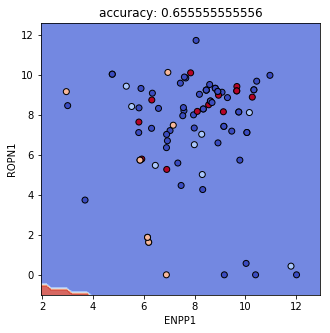

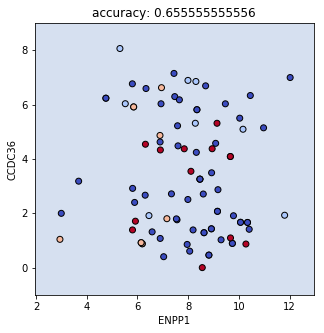

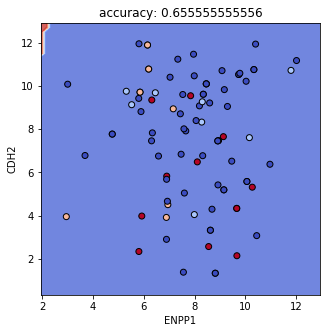

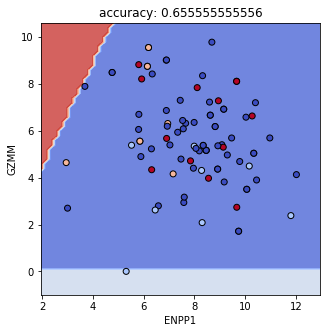

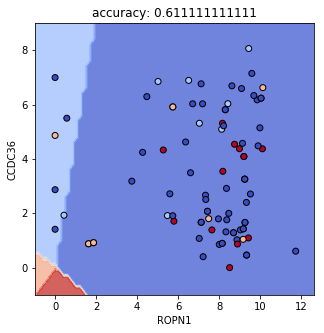

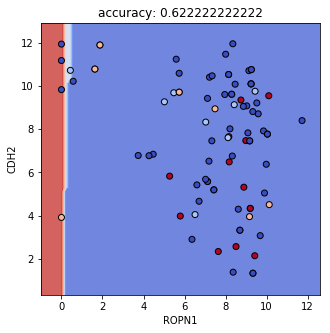

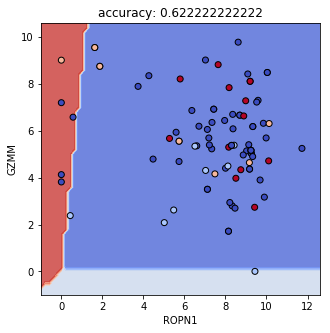

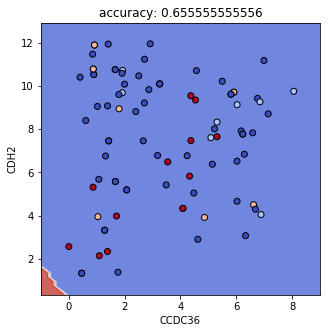

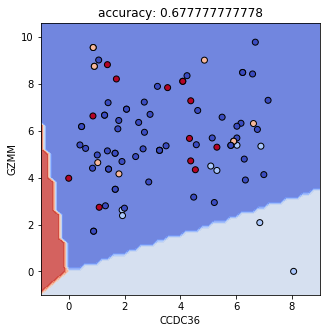

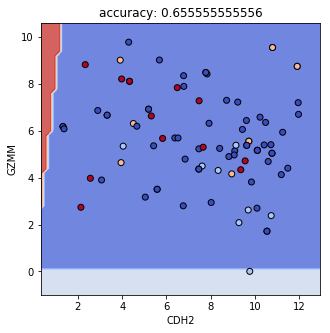

In [92]:
for i, axis in enumerate(features):
    X_sub = X[axis]

    # create a mesh to plot in
    h = 0.2  # step size in the mesh
    x_min, x_max = X_sub[axis[0]].min() - 1, X_sub[axis[0]].max() + 1
    y_min, y_max = X_sub[axis[1]].min() - 1, X_sub[axis[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.figure(figsize=(5,5)) 
#     plt.subplot(6, 6, i+1)
#     plt.subplots_adjust(wspace=0.1, hspace=0.1)

    model.fit(X_sub, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    accuracy = metrics.accuracy_score(y_pred=np.asanyarray(np.round(model.predict(X_sub)), dtype=int), y_true=y)

    # Plot also the training points
    plt.scatter(X_sub[axis[0]], X_sub[axis[1]], c=y, cmap=plt.cm.coolwarm, edgecolors="black")
    plt.xlabel(axis[0])
    plt.ylabel(axis[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
#     plt.xticks(())
#     plt.yticks(())
#     plt.legend(loc='lower left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
    plt.title("accuracy: "+str(accuracy))
plt.show()